# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np #nombre du coups necessaires pour arriver 

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

3

### Compléter le code et commenter

In [4]:
def sim(S):
    
    A=0
    NA=1    
    c=Roll()
#np.random.seed(2021)
    while (c<6) :
        NA=NA+1
        c=Roll()
        #print(c)
    A=1
    #print(NA)
    while A!=S :
        c=Roll()
        NA+=1
        if A+c<S:
            A+=c
        elif A+c==S:
            A=S
    return NA
        
    

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(S):
    
    A=0
    NA=1    
    c=Roll()
#np.random.seed(2021)
    while (c<6) :
        NA=NA+1
        c=Roll()
        #print(c)
    A=1
    #print(NA)
    while A!=S :
        c=Roll()
        NA+=1
        if A+c<S:
            A+=c
        elif A+c==S:
            A=S
    return NA
        

In [6]:
sim(20)

15

### Simulation de $10^5$  scénario 

In [7]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)

In [8]:
ESP=Freq.sum()/10**4
ESP

16.1478

In [9]:
x=list(range(10,20)) #tableau des nombres de pas

In [10]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/50000 for u in x]

In [11]:
import matplotlib.pyplot as plt

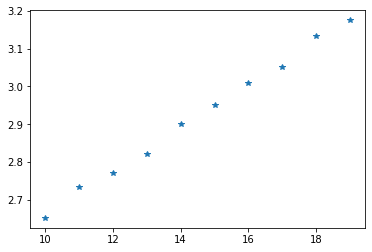

In [12]:
plt.plot(x,y,'*')

In [13]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [14]:
slope

0.0578210909090909

In [15]:
intercept


2.081502181818182

In [16]:
yy=[slope*u+intercept for u in x]

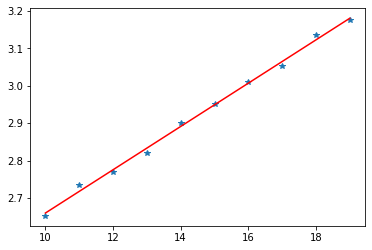

In [17]:
plt.plot(x,y,'*',x,yy,'r-')

#  conclusion: Simulation du jeux de LIDO simplifié avec un seul pion

**Objectif 1 : Simuler le jeux** 

S= Nombre des pas nécessaire pour atteindre la cible<br> 
A= position du pion<br>
NA=nombre du coups effectués<br>
    .On fait deplacer le pion de sa position initiale A avec un nombre du coups effectués NA afin d'atteindre la cible S.  
    .il faut avoir une valeur de dé = 6 pour avancer a la position 1.
    .la fonction sim nous aide a determiner le nombre des essais necessaires pour sortir de sa prison avec un nombre exact 
    de marches por atteindre la cible S 
    
**Objectif 2 : Calculer une estimation de l'éspérance mathématique de  𝑋𝑛  en utilisant python** <br>
    .la simulation nous permet d'avoir l'éspérance du sceanrio 10^5 et la nuage des points de la moyenne dans l'intervalle [10.20].

**Objéctif 3 : Observer la variation de  𝔼(𝑋𝑛)  en fonction de  𝑛** <br>
    .On a simuler le jeu mathématiquement afin d'avoir `une estimation moyenne` pour degager **une formule mathematique**.<br>
    .On obtient une droite d'equation y=ax+b.